In [198]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MultiLabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.decomposition import PCA
import random
random.seed(42)
np.random.seed(42)

In [199]:
try:
    df = pd.read_csv("ai_job_dataset.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: ai_job_dataset.csv not found. Please download it and place it in the working directory or provide the correct path.")
    print("You can download it from: https://www.kaggle.com/datasets/bismasajjad/global-ai-job-market-and-salary-trends-2025")
    exit()

Dataset loaded successfully.


In [200]:
print("\n--- Initial Data Overview ---")
print("Shape:", df.shape)


--- Initial Data Overview ---
Shape: (15000, 19)


In [201]:
print(df.head())
print("\nInfo:")
df.info()

    job_id              job_title  salary_usd salary_currency  \
0  AI00001  AI Research Scientist       90376             USD   
1  AI00002   AI Software Engineer       61895             USD   
2  AI00003          AI Specialist      152626             USD   
3  AI00004           NLP Engineer       80215             USD   
4  AI00005          AI Consultant       54624             EUR   

  experience_level employment_type company_location company_size  \
0               SE              CT            China            M   
1               EN              CT           Canada            M   
2               MI              FL      Switzerland            L   
3               SE              FL            India            M   
4               EN              PT           France            S   

  employee_residence  remote_ratio  \
0              China            50   
1            Ireland           100   
2        South Korea             0   
3              India            50   
4         

In [202]:
df[['job_title',
'salary_currency',
'experience_level',
'employment_type',
'company_location',
'company_size',
'employee_residence',
'remote_ratio',
'education_required',
'industry']].nunique()

job_title             20
salary_currency        3
experience_level       4
employment_type        4
company_location      20
company_size           3
employee_residence    20
remote_ratio           3
education_required     4
industry              15
dtype: int64


Descriptive Statistics (Numerical):


<Axes: >

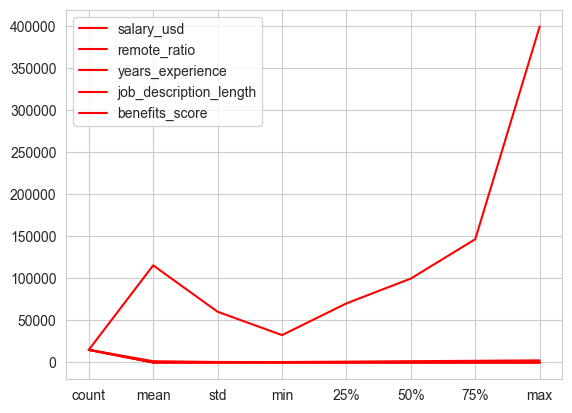

In [203]:
print("\nDescriptive Statistics (Numerical):")
df.describe().plot(kind='line',color='r')

In [204]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
job_id                    0
job_title                 0
salary_usd                0
salary_currency           0
experience_level          0
employment_type           0
company_location          0
company_size              0
employee_residence        0
remote_ratio              0
required_skills           0
education_required        0
years_experience          0
industry                  0
posting_date              0
application_deadline      0
job_description_length    0
benefits_score            0
company_name              0
dtype: int64


# **EDA and Visualization**


C:\Users\waqas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


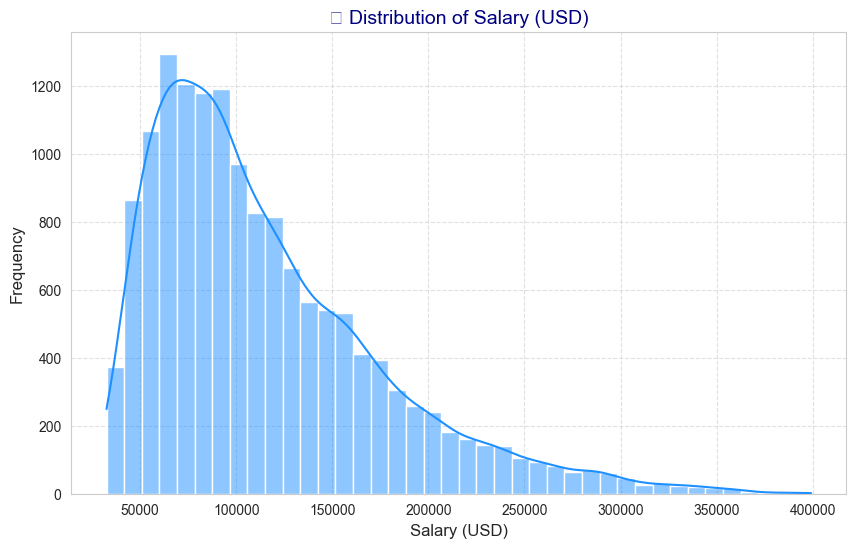

C:\Users\waqas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


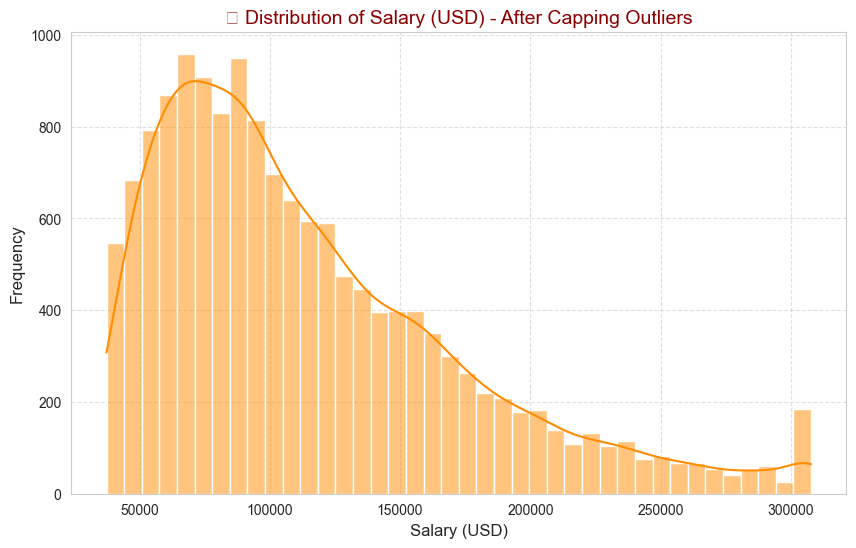

In [205]:
sns.set_style("whitegrid")
sns.set_palette("Set2")  

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_usd'], kde=True, color='dodgerblue', bins=40)
plt.title('🎯 Distribution of Salary (USD)', fontsize=14, color='navy')
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Q1 = df['salary_usd'].quantile(0.01)
Q3 = df['salary_usd'].quantile(0.99)
IQR = Q3 - Q1
df['salary_usd'] = np.clip(df['salary_usd'], Q1, Q3)

plt.figure(figsize=(10, 6))
sns.histplot(df['salary_usd'], kde=True, color='darkorange', bins=40)
plt.title('🎯 Distribution of Salary (USD) - After Capping Outliers', fontsize=14, color='darkred')
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [206]:
df

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376.0,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895.0,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626.0,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215.0,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624.0,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,Robotics Engineer,38604.0,USD,EN,FL,Finland,S,Finland,50,"Java, Kubernetes, Azure",Bachelor,1,Energy,2025-02-06,2025-03-25,1635,7.9,Advanced Robotics
14996,AI14997,Machine Learning Researcher,57811.0,GBP,EN,CT,United Kingdom,M,United Kingdom,0,"Mathematics, Docker, SQL, Deep Learning",Master,0,Government,2024-10-16,2024-10-30,1624,8.2,Smart Analytics
14997,AI14998,NLP Engineer,189490.0,USD,EX,CT,South Korea,L,South Korea,50,"Scala, Spark, NLP",Associate,17,Manufacturing,2024-03-19,2024-05-02,1336,7.4,AI Innovations
14998,AI14999,Head of AI,79461.0,EUR,EN,FT,Netherlands,M,Netherlands,0,"Java, Computer Vision, Python, TensorFlow",PhD,1,Real Estate,2024-03-22,2024-04-23,1935,5.6,Smart Analytics


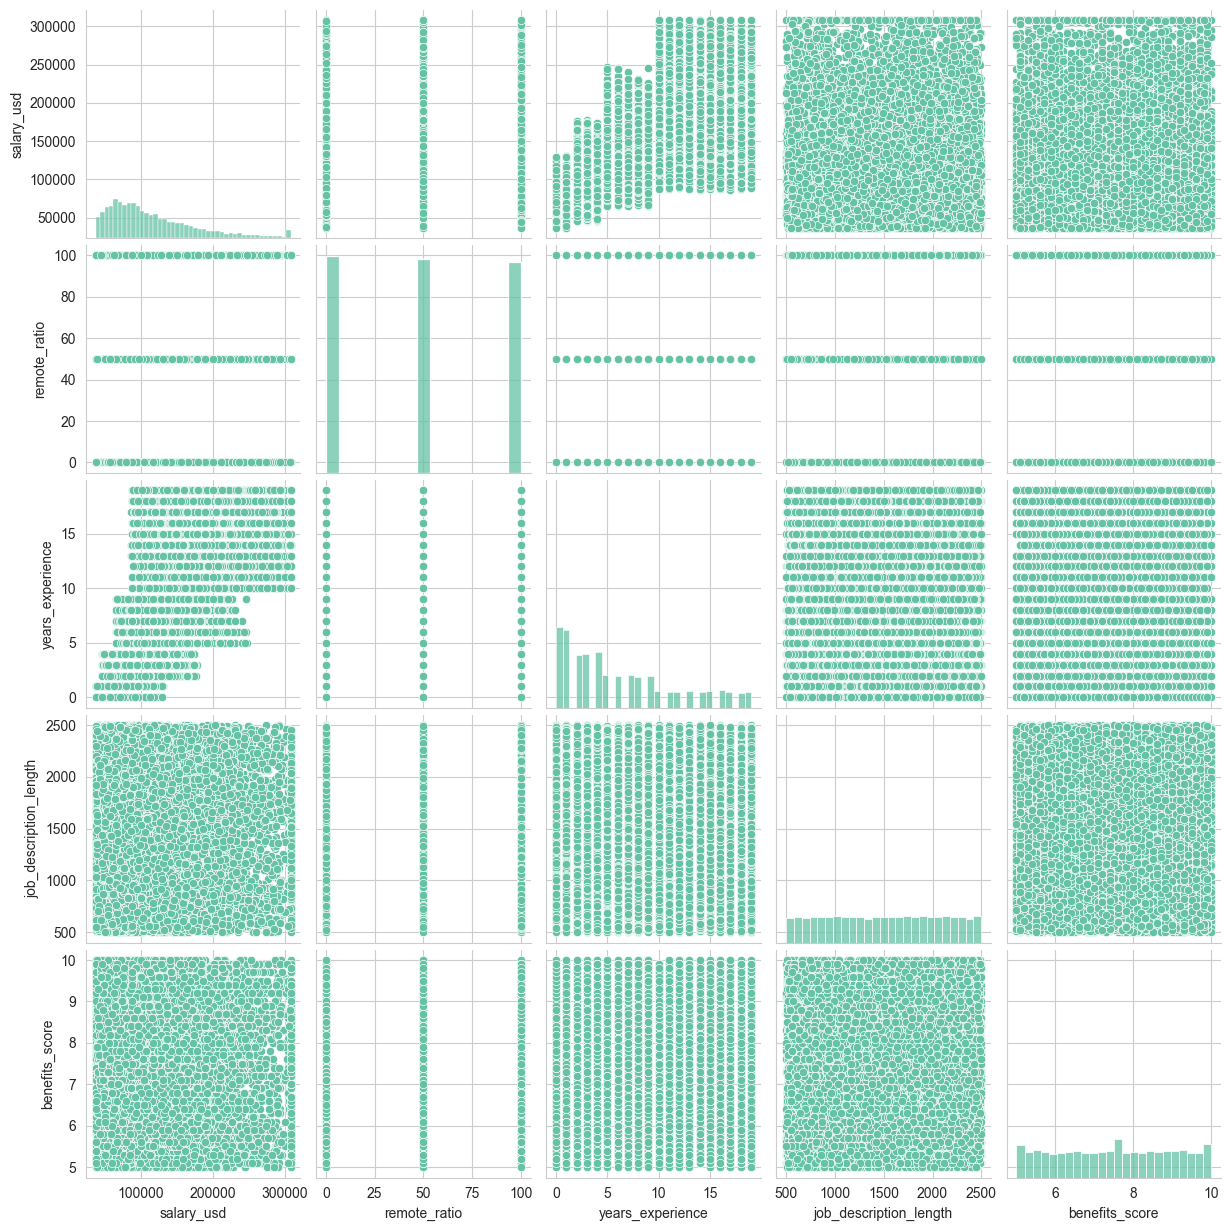

In [207]:
sns.pairplot(df)
plt.show()

C:\Users\waqas\AppData\Local\Temp\ipykernel_4484\563354754.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="job_title", order=data['job_title'].value_counts().index, palette="husl")
C:\Users\waqas\AppData\Local\Temp\ipykernel_4484\563354754.py:13: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\waqas\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128188 (\N{BRIEFCASE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


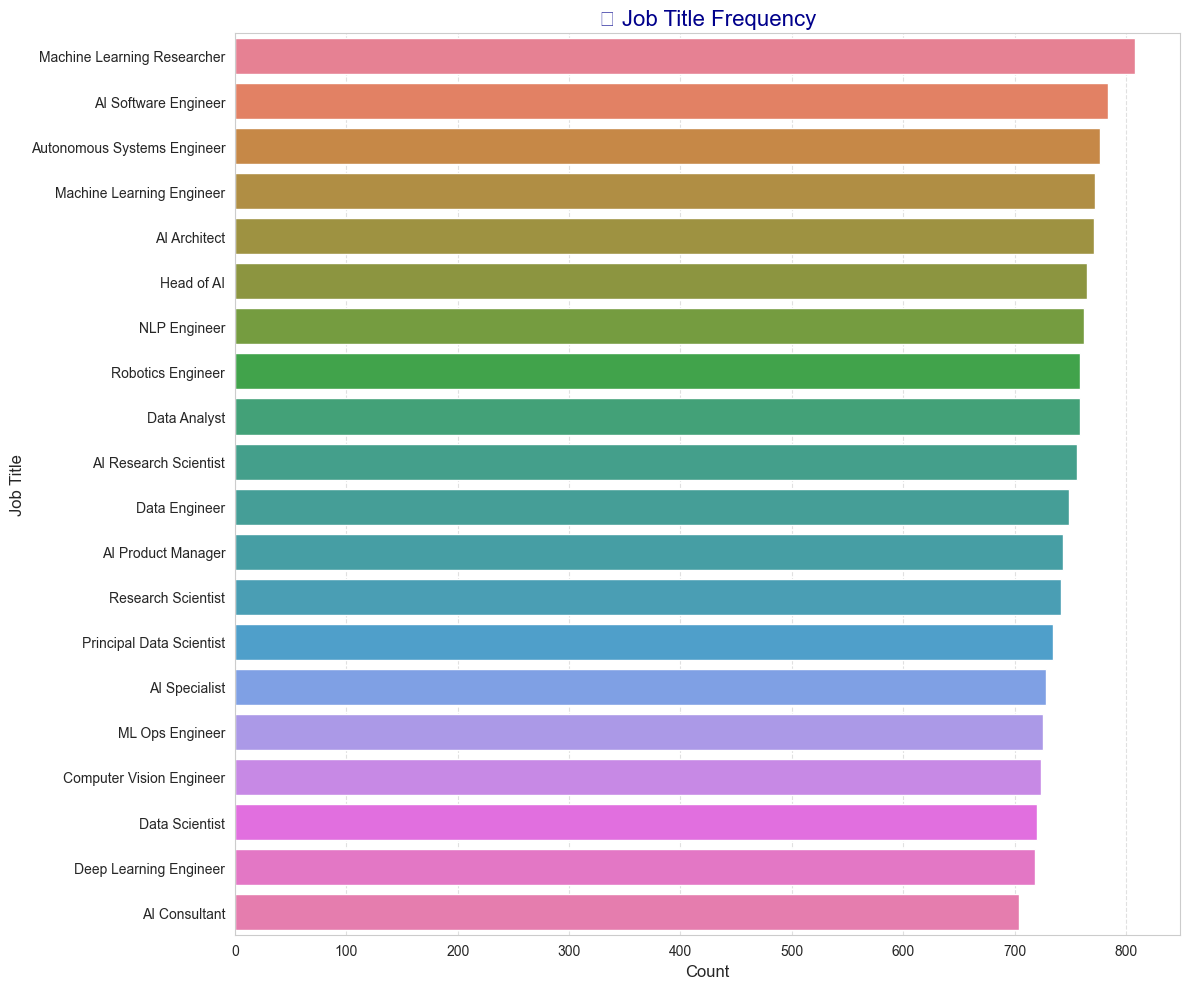

In [208]:
data = df.copy()

sns.set_style("whitegrid")
sns.set_palette("Spectral")  

plt.figure(figsize=(12, 10))
sns.countplot(data=data, y="job_title", order=data['job_title'].value_counts().index, palette="husl")
plt.title("💼 Job Title Frequency", fontsize=16, color='darkblue')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Job Title", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


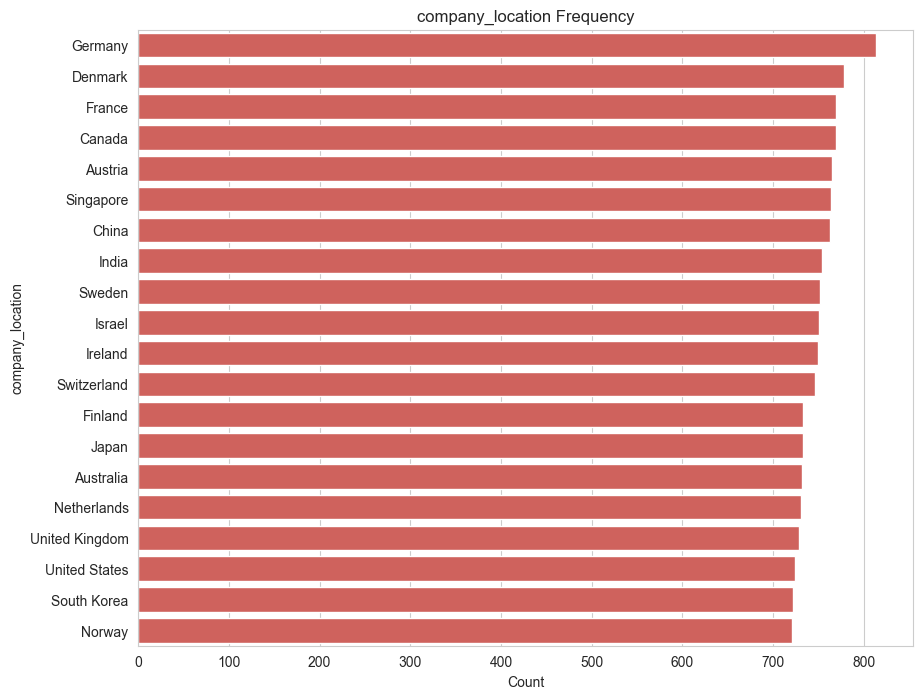

In [209]:
plt.figure(figsize=(10, 8))
sns.countplot(data, y="company_location", order=data.company_location.value_counts().index)
plt.title("company_location Frequency")
plt.xlabel("Count")
plt.ylabel("company_location")
plt.show()

C:\Users\waqas\AppData\Local\Temp\ipykernel_4484\1007644762.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="USD: US Dollar\nEUR: Euro\nGBP: British Pound", loc="lower right")


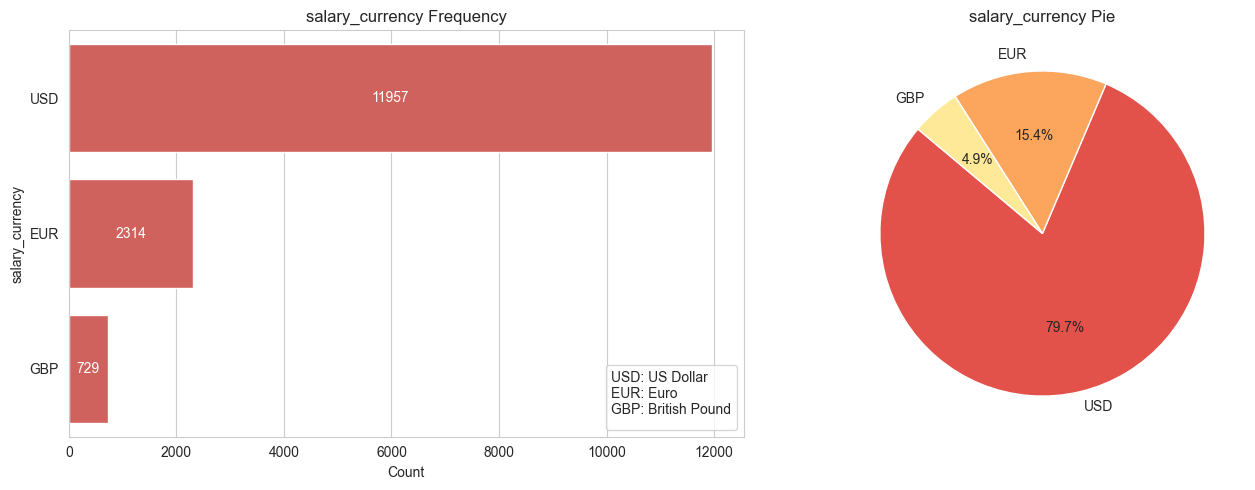

In [210]:
plt.figure(figsize=(14, 5))


plt.subplot(1, 2, 1)
ax = sns.countplot(data=data, y="salary_currency", order=data.salary_currency.value_counts().index)
plt.title("salary_currency Frequency")
plt.xlabel("Count")
plt.ylabel("salary_currency")
plt.legend(title="USD: US Dollar\nEUR: Euro\nGBP: British Pound", loc="lower right")
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=10)

plt.subplot(1, 2, 2)
salary_counts = data['salary_currency'].value_counts()
plt.pie(salary_counts, labels=salary_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("salary_currency Pie")

plt.tight_layout()
plt.show()

Dataset 'ai_job_dataset.csv' loaded successfully into df1.


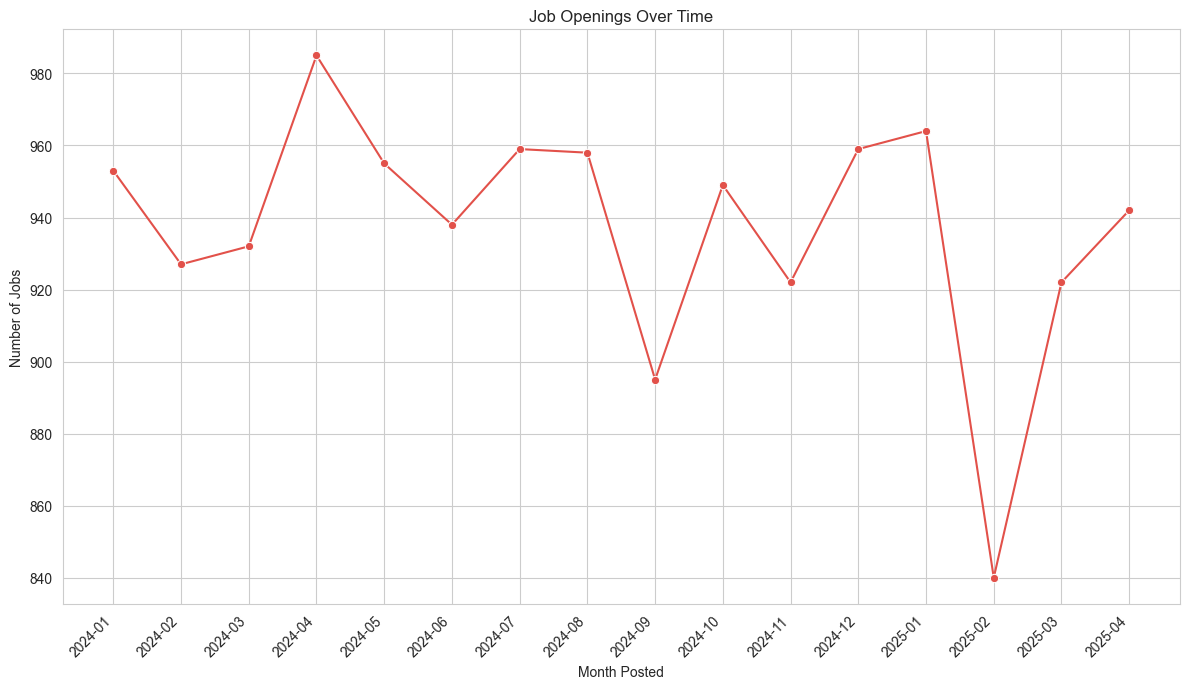

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df1 = pd.read_csv("ai_job_dataset.csv")
    print("Dataset 'ai_job_dataset.csv' loaded successfully into df1.")
except FileNotFoundError:
    print("Error: 'ai_job_dataset.csv' not found.")
    print("Please ensure the CSV file is in the same directory as the script, or provide the full path.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the CSV: {e}")
    
    exit()

if 'posting_date' in df1.columns:
    df1['posting_date'] = pd.to_datetime(df1['posting_date'], errors='coerce')
    df1.dropna(subset=['posting_date'], inplace=True)

    if not df1.empty:
        df1['month_posted'] = df1['posting_date'].dt.to_period('M').astype(str)
        fig6, ax6 = plt.subplots(figsize=(12, 7))
        monthly_counts = df1['month_posted'].value_counts().sort_index()

        if not monthly_counts.empty:
            sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', ax=ax6, sort=False)
            ax6.set_title("Job Openings Over Time")
            ax6.set_xlabel("Month Posted")
            ax6.set_ylabel("Number of Jobs")

            tick_labels = monthly_counts.index
            if len(tick_labels) > 12:
                step = max(1, len(tick_labels) // 10)
                ax6.set_xticks(tick_labels[::step])
                ax6.set_xticklabels(tick_labels[::step], rotation=45, ha="right")
            else:
                ax6.set_xticks(tick_labels)
                ax6.set_xticklabels(tick_labels, rotation=45, ha="right")

            plt.tight_layout()
            plt.show()
        else:
            print("No data available to plot for monthly job openings after processing dates (monthly_counts is empty).")
    else:
        print("DataFrame df1 is empty after attempting to process 'posting_date'. No plot will be generated.")
else:
    print("Column 'posting_date' not found in the DataFrame df1. Cannot generate the plot.")


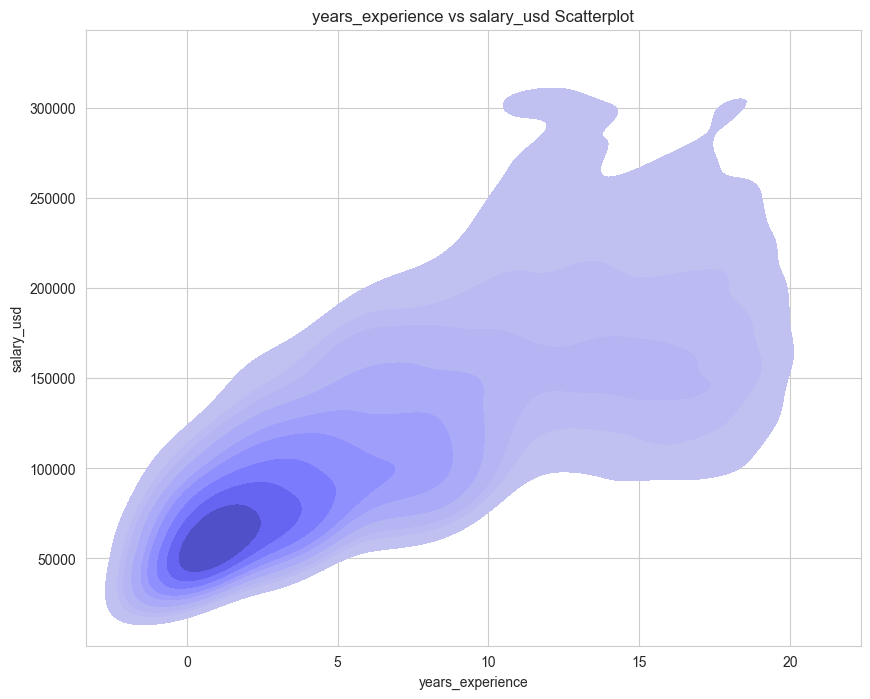

In [190]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='years_experience', y='salary_usd', fill=True, color='blue')
plt.xlabel('years_experience')
plt.ylabel('salary_usd')
plt.title('years_experience vs salary_usd Scatterplot')
plt.show()


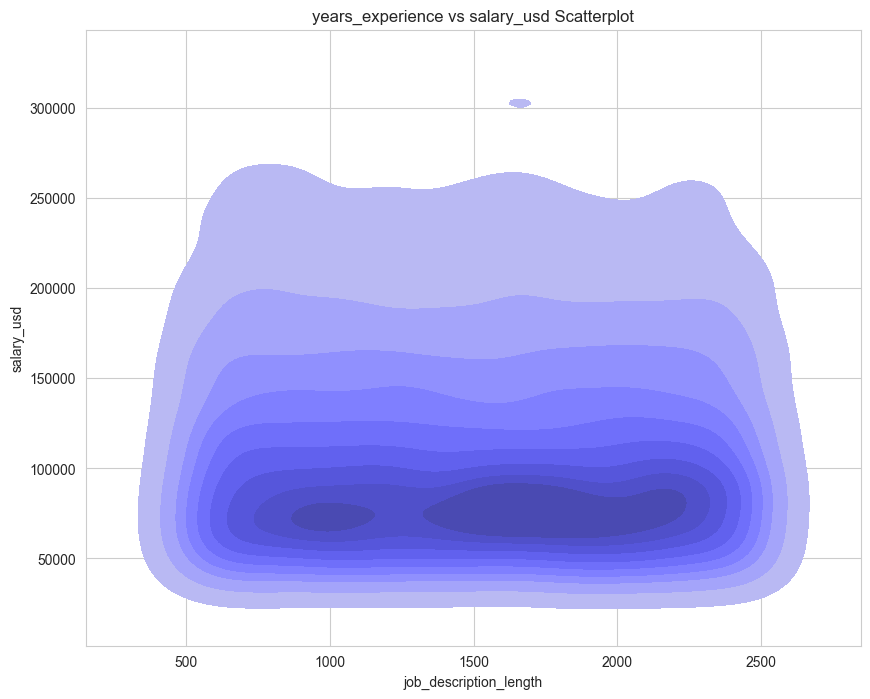

In [191]:
plt.figure(figsize=(10, 8))
sns.kdeplot(data=df, x='job_description_length', y='salary_usd', fill=True,color='blue')
plt.xlabel('job_description_length')
plt.ylabel('salary_usd')
plt.title('years_experience vs salary_usd Scatterplot')
plt.show()

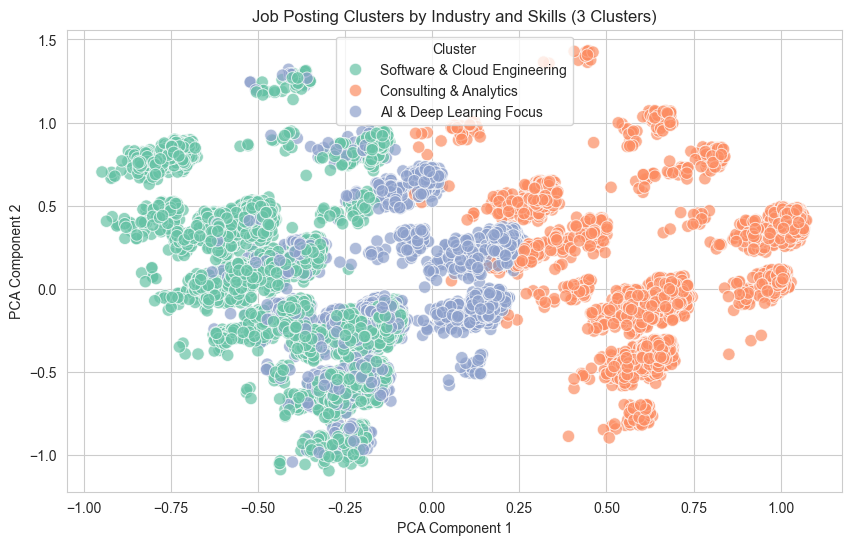

In [212]:
df['skills_list'] = df['required_skills'].str.split(',').apply(lambda x: [s.strip() for s in x])

industry_ohe = pd.get_dummies(df['industry'], prefix='industry')

mlb = MultiLabelBinarizer()
skills_encoded = pd.DataFrame(mlb.fit_transform(df['skills_list']), columns=mlb.classes_, index=df.index)

X = pd.concat([industry_ohe, skills_encoded], axis=1)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

cluster_summaries = {}

for cluster_num in range(3):
    cluster_data = df[df['cluster'] == cluster_num]
    
    top_industries = cluster_data['industry'].value_counts().head(3).index.tolist()
    cluster_summaries[cluster_num] = {
        'top_industries': top_industries,
        'top_skills': cluster_data['skills_list'].explode().value_counts().head(5).index.tolist()
    }

cluster_names = {
    0: "AI & Deep Learning Focus",
    1: "Software & Cloud Engineering",
    2: "Consulting & Analytics"
}

df['cluster_label'] = df['cluster'].map(cluster_names)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10,6))
palette = sns.color_palette('Set2', 3)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['cluster_label'], palette=palette, s=80, alpha=0.7)
plt.title('Job Posting Clusters by Industry and Skills (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()


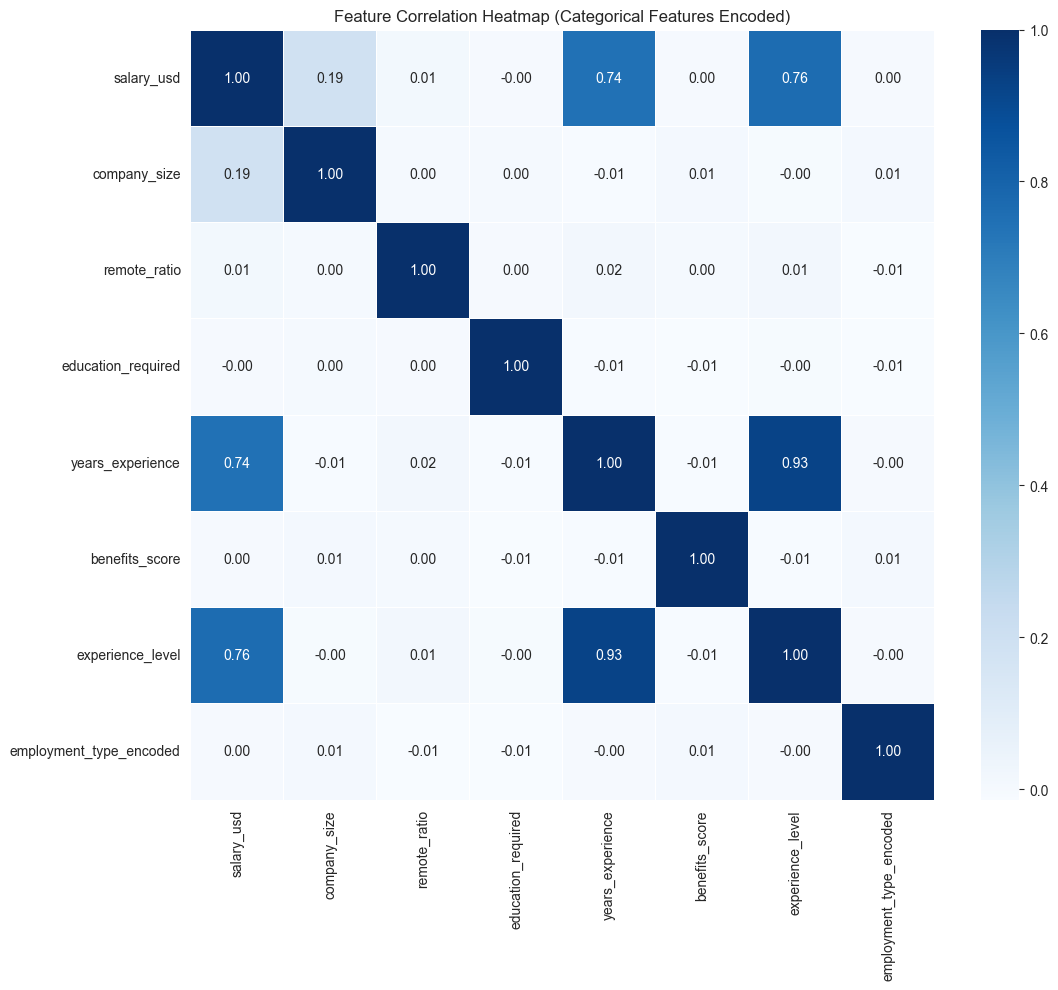

In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


columns_for_heatmap = ['salary_usd', 'company_size', 'remote_ratio', 'education_required',
                    'years_experience', 'benefits_score', 'experience_level', 'employment_type']
df_corr = df[columns_for_heatmap].copy()

ordinal_feature_maps = {
    'company_size': {'S': 0, 'M': 1, 'L': 2},
    'education_required': {'Associate': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3},
    'experience_level': {'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3}
}

for feature, mapping in ordinal_feature_maps.items():
    if feature in df_corr.columns:
        df_corr[feature] = df_corr[feature].map(mapping)

if 'employment_type' in df_corr.columns:
    df_corr['employment_type_encoded'], _ = pd.factorize(df_corr['employment_type'])
    df_corr.drop('employment_type', axis=1, inplace=True)

df_numeric_for_corr = df_corr.select_dtypes(include=np.number)

if not df_numeric_for_corr.empty:
    correlation_matrix = df_numeric_for_corr.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', linewidths=.5, cbar=True)
    plt.title('Feature Correlation Heatmap (Categorical Features Encoded)')
    plt.show()
else:
    print("No numeric columns available for correlation heatmap after processing.")


# **Preprocessing**


In [214]:
TARGET = 'salary_usd'

cols_to_drop = ['job_id', 'salary_currency', 'company_name', 'posting_date', 'application_deadline']
df_processed = df.drop(columns=cols_to_drop, errors='ignore')

# df_processed['required_skills'] = df_processed['required_skills'].fillna('')
df_processed['required_skills_list'] = df_processed['required_skills'].apply(lambda x: [skill.strip() for skill in x.split(',') if skill.strip()])

mlb = MultiLabelBinarizer()
skills_encoded = mlb.fit_transform(df_processed['required_skills_list'])
skills_df = pd.DataFrame(skills_encoded, columns=[f"skill_{cls}" for cls in mlb.classes_], index=df_processed.index)

skill_counts = skills_df.sum().sort_values(ascending=False)
top_n_skills = 30 
top_skills_cols = skill_counts.head(top_n_skills).index.tolist()
skills_df_top = skills_df[top_skills_cols]

df_processed = pd.concat([df_processed, skills_df_top], axis=1)
df_processed = df_processed.drop(columns=['required_skills', 'required_skills_list'])


ordinal_features_map = {
    'experience_level': ['EN', 'MI', 'SE', 'EX'], 
    'company_size': ['S', 'M', 'L'],
    'education_required': ['Associate', 'Bachelor', 'Master', 'PhD'] 
}
ordinal_features = list(ordinal_features_map.keys())

high_card_cat_features = ['job_title', 'company_location', 'employee_residence', 'industry']
for col in high_card_cat_features:
    top_categories = df_processed[col].value_counts().nlargest(15).index 
    df_processed[col] = df_processed[col].apply(lambda x: x if x in top_categories else 'Other')

nominal_cat_features = ['employment_type'] + high_card_cat_features 

numerical_features = df_processed.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove(TARGET)
numerical_features = [col for col in numerical_features if not col.startswith('skill_')]

all_defined_features = ordinal_features + nominal_cat_features + numerical_features + [TARGET] + top_skills_cols
current_cols = df_processed.columns.tolist()

df_processed = df_processed[list(set(current_cols) & set(all_defined_features))]


print("\n--- Feature List after Preprocessing Step 1 ---")
print("Ordinal features:", ordinal_features)
print("Nominal categorical features:", nominal_cat_features)
print("Numerical features:", numerical_features)
print("Skill features (sample):", top_skills_cols[:5])




--- Feature List after Preprocessing Step 1 ---
Ordinal features: ['experience_level', 'company_size', 'education_required']
Nominal categorical features: ['employment_type', 'job_title', 'company_location', 'employee_residence', 'industry']
Numerical features: ['remote_ratio', 'years_experience', 'job_description_length', 'benefits_score', 'cluster']
Skill features (sample): ['skill_Python', 'skill_SQL', 'skill_TensorFlow', 'skill_Kubernetes', 'skill_Scala']


In [215]:
X = df_processed.drop(TARGET, axis=1)
y = df_processed[TARGET]

cat_features_for_catboost = [X.columns.get_loc(col) for col in ordinal_features + nominal_cat_features if col in X.columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set shape: X_train: (12000, 37), y_train: (12000,)
Test set shape: X_test: (3000, 37), y_test: (3000,)


In [217]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [218]:
ordinal_pipelines = []
for i, feature in enumerate(ordinal_features):
    if feature in X_train.columns: 
        categories = [ordinal_features_map[feature]]
        ordinal_pipelines.append(
            (f'ordinal_{feature}', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OrdinalEncoder(categories=categories, handle_unknown='use_encoded_value', unknown_value=-1))
            ]), [feature])
        )

nominal_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) 
])


In [ ]:
active_numerical_features = [f for f in numerical_features if f in X_train.columns]
active_nominal_cat_features = [f for f in nominal_cat_features if f in X_train.columns]
active_skill_features = [f for f in top_skills_cols if f in X_train.columns] # Skills are already binary 0/1

transformers_list = []
if active_numerical_features:
    transformers_list.append(('num', numerical_pipeline, active_numerical_features))
if active_nominal_cat_features:
    transformers_list.append(('nom_cat', nominal_pipeline, active_nominal_cat_features))

for name, pipe, cols in ordinal_pipelines:
    transformers_list.append((name, pipe, cols))

In [220]:
preprocessor_for_standard_models = ColumnTransformer(
    transformers=transformers_list,
    remainder='passthrough'
)

# **Model Training and Evaluation**


In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1), 
    "XGBoost Regressor": XGBRegressor(random_state=42, n_estimators=100, n_jobs=-1), 
    # CatBoost will be handled slightly differently due to its native categorical support
}

In [ ]:
X_train_catboost = X_train.copy()
X_test_catboost = X_test.copy()

for col in ordinal_features + nominal_cat_features:
    if col in X_train_catboost.columns:
        mode_val = X_train_catboost[col].mode()[0]
        X_train_catboost[col] = X_train_catboost[col].fillna(mode_val)
        X_test_catboost[col] = X_test_catboost[col].fillna(mode_val)

for col in numerical_features:
    if col in X_train_catboost.columns:
        median_val = X_train_catboost[col].median()
        X_train_catboost[col] = X_train_catboost[col].fillna(median_val)
        X_test_catboost[col] = X_test_catboost[col].fillna(median_val) 

catboost_model = CatBoostRegressor(random_state=42, iterations=200, verbose=0, cat_features=cat_features_for_catboost)

In [ ]:
results = {}
feature_importances = {}

print("\n--- Model Training and Evaluation ---")
for name, model in models.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor_for_standard_models),
                            ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results[name] = {"R²": r2, "MAE": mae, "MSE": mse, "RMSE": rmse}
    print(f"{name} - R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}")

    if hasattr(model, 'feature_importances_'):
        try:
            ct_feature_names = []
            for transformer_name, transformer, features_list in preprocessor_for_standard_models.transformers_:
                if transformer == 'drop' or transformer == 'passthrough':
                    continue
                if hasattr(transformer, 'get_feature_names_out'):
                    if isinstance(transformer, Pipeline): 
                        current_transformer = transformer.named_steps[transformer.steps[-1][0]] 
                        if hasattr(current_transformer, 'get_feature_names_out'):
                            if isinstance(current_transformer, OneHotEncoder) or isinstance(current_transformer, OrdinalEncoder):
                                names = current_transformer.get_feature_names_out(features_list)
                            else: 
                                names = features_list
                            ct_feature_names.extend(names)
                        else: 
                            ct_feature_names.extend(features_list)

                    else: 
                        names = transformer.get_feature_names_out(features_list)
                        ct_feature_names.extend(names)
                else: 
                    ct_feature_names.extend(features_list)
            
            if preprocessor_for_standard_models.remainder == 'passthrough':

                passthrough_cols_indices = [X_train.columns.get_loc(col) for col in active_skill_features if col in X_train.columns] # Assuming skills are passthrough
                passthrough_cols_names = [X_train.columns[i] for i in passthrough_cols_indices]
                # ct_feature_names.extend(passthrough_cols_names) # This logic is tricky with ColumnTransformer
                # A simpler way to get all feature names after transformation if above is complex:
                # This requires fitting the preprocessor alone first.
                # preprocessor_for_standard_models.fit(X_train)
                # ct_feature_names = preprocessor_for_standard_models.get_feature_names_out()

            importances = model.feature_importances_
            feature_importances[name] = pd.Series(importances).sort_values(ascending=False)
            print(f"Top 5 feature importances for {name}:\n{feature_importances[name].head()}")


        except Exception as e:
            print(f"Could not retrieve feature names for {name}: {e}")
            importances = model.feature_importances_
            feature_importances[name] = pd.Series(importances).sort_values(ascending=False)

    elif hasattr(model, 'coef_'): 
        try:
            # ct_feature_names = preprocessor_for_standard_models.get_feature_names_out() # Requires fitting preprocessor
            # feature_importances[name] = pd.Series(model.coef_, index=ct_feature_names).sort_values(ascending=False, key=abs)
            feature_importances[name] = pd.Series(model.coef_).sort_values(ascending=False, key=abs) # Without names for now
            print(f"Top 5 coefficients (absolute value) for {name}:\n{feature_importances[name].head()}")
        except Exception as e:
            print(f"Could not retrieve feature names for {name} coefficients: {e}")
            feature_importances[name] = pd.Series(model.coef_).sort_values(ascending=False, key=abs)



--- Model Training and Evaluation ---
Training Linear Regression...
Linear Regression - R²: 0.8165, MAE: 18774.91, RMSE: 25495.28
Top 5 coefficients (absolute value) for Linear Regression:
13    5.216697e+15
23    5.216697e+15
17    5.216697e+15
19    5.216697e+15
18    5.216697e+15
dtype: float64
Training Random Forest Regressor...
Random Forest Regressor - R²: 0.8645, MAE: 15604.10, RMSE: 21912.53
Could not retrieve feature names for Random Forest Regressor: input_features is not equal to feature_names_in_
Training XGBoost Regressor...


C:\Users\waqas\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


XGBoost Regressor - R²: 0.8533, MAE: 16126.29, RMSE: 22801.01
Could not retrieve feature names for XGBoost Regressor: input_features is not equal to feature_names_in_


C:\Users\waqas\AppData\Roaming\Python\Python312\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


In [ ]:
print(f"\nTraining CatBoost Regressor...")
valid_cat_features_indices = []
cat_feature_names_for_catboost = []

temp_cat_features_for_catboost = ordinal_features + nominal_cat_features
for col_name in temp_cat_features_for_catboost:
    if col_name in X_train_catboost.columns:
        valid_cat_features_indices.append(X_train_catboost.columns.get_loc(col_name))
        cat_feature_names_for_catboost.append(col_name)


catboost_numerical_cols = [col for col in active_numerical_features if col in X_train_catboost.columns]
if catboost_numerical_cols: 
    scaler_catboost = StandardScaler()
    X_train_catboost[catboost_numerical_cols] = scaler_catboost.fit_transform(X_train_catboost[catboost_numerical_cols])
    X_test_catboost[catboost_numerical_cols] = scaler_catboost.transform(X_test_catboost[catboost_numerical_cols])


catboost_model = CatBoostRegressor(
    random_state=42,
    iterations=200, 
    verbose=0,      
    cat_features=cat_feature_names_for_catboost 
)

catboost_model.fit(X_train_catboost, y_train)
y_pred_catboost = catboost_model.predict(X_test_catboost)



Training CatBoost Regressor...


In [225]:
r2_cb = r2_score(y_test, y_pred_catboost)
mae_cb = mean_absolute_error(y_test, y_pred_catboost)
mse_cb = mean_squared_error(y_test, y_pred_catboost)
rmse_cb = np.sqrt(mse_cb)
results["CatBoost Regressor"] = {"R²": r2_cb, "MAE": mae_cb, "MSE": mse_cb, "RMSE": rmse_cb}
print(f"CatBoost Regressor - R²: {r2_cb:.4f}, MAE: {mae_cb:.2f}, RMSE: {rmse_cb:.2f}")

CatBoost Regressor - R²: 0.8736, MAE: 15156.06, RMSE: 21159.71


In [226]:
if hasattr(catboost_model, 'get_feature_importance'):
    cb_importances = catboost_model.get_feature_importance()
    cb_feature_names = X_train_catboost.columns
    feature_importances["CatBoost Regressor"] = pd.Series(cb_importances, index=cb_feature_names).sort_values(ascending=False)
    print(f"Top 5 feature importances for CatBoost Regressor:\n{feature_importances['CatBoost Regressor'].head()}")

Top 5 feature importances for CatBoost Regressor:
years_experience      34.411736
company_location      33.810094
experience_level       9.912459
company_size           9.690533
employee_residence     5.570708
dtype: float64


# **Comparative Performance & Insights**


In [227]:
results_df = pd.DataFrame(results).T.sort_values(by="R²", ascending=False)
print("\n--- Comparative Model Performance ---")
print(results_df)



--- Comparative Model Performance ---
                               R²           MAE           MSE          RMSE
CatBoost Regressor       0.873618  15156.061408  4.477335e+08  21159.713908
Random Forest Regressor  0.864465  15604.100524  4.801591e+08  21912.533946
XGBoost Regressor        0.853251  16126.293414  5.198860e+08  22801.008898
Linear Regression        0.816521  18774.906017  6.500095e+08  25495.283967


In [228]:
results_df

,R²,MAE,MSE,RMSE
CatBoost Regressor,0.873618,15156.061408,4.477335e+08,21159.713908
Random Forest Regressor,0.864465,15604.100524,4.801591e+08,21912.533946
XGBoost Regressor,0.853251,16126.293414,5.198860e+08,22801.008898
Linear Regression,0.816521,18774.906017,6.500095e+08,25495.283967


C:\Users\waqas\AppData\Local\Temp\ipykernel_4484\3829817385.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
C:\Users\waqas\AppData\Local\Temp\ipykernel_4484\3829817385.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
C:\Users\waqas\AppData\Local\Temp\ipykernel_4484\3829817385.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
C:\Users\waqas\AppData\Lo

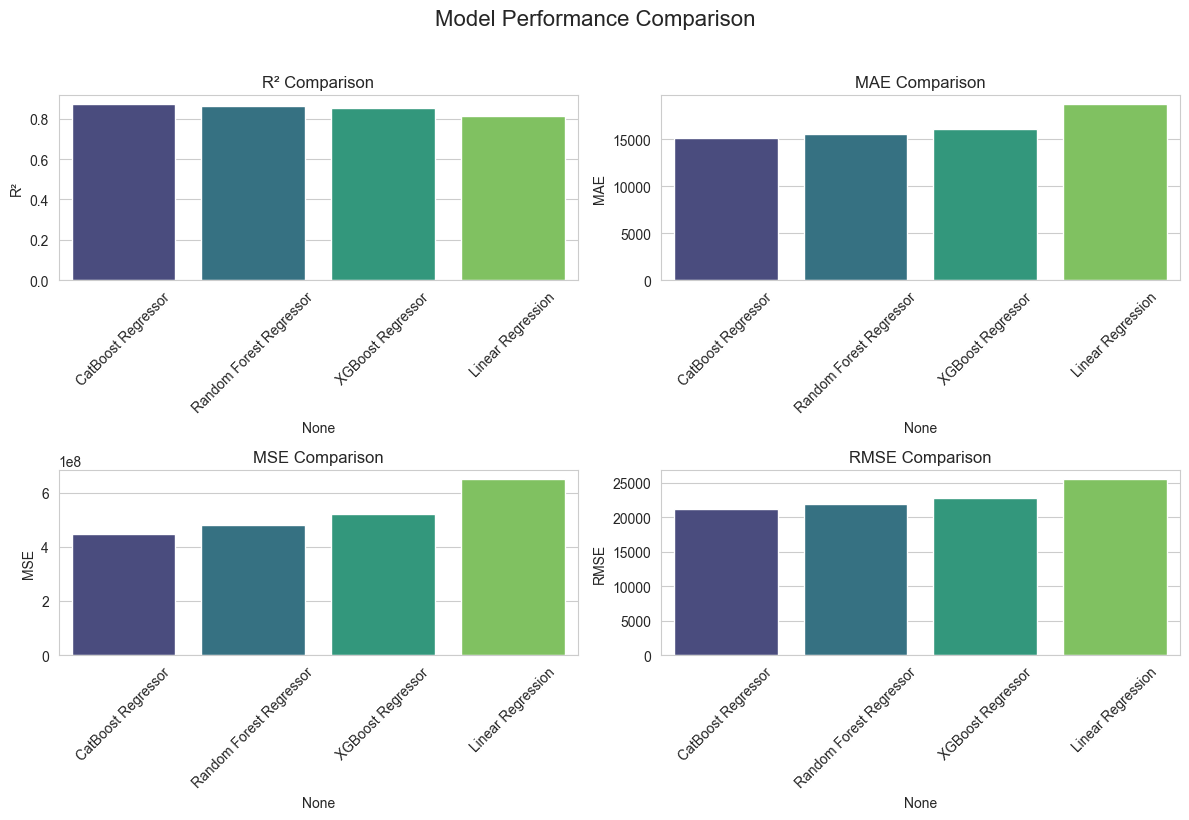

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df['MSE'] = results_df['MSE'].astype(float)

plt.figure(figsize=(12, 8))
metrics = ['R²', 'MAE', 'MSE', 'RMSE']

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=results_df.index, y=results_df[metric], palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.tight_layout()

plt.suptitle("Model Performance Comparison", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()



--- Feature Importance Insights ---


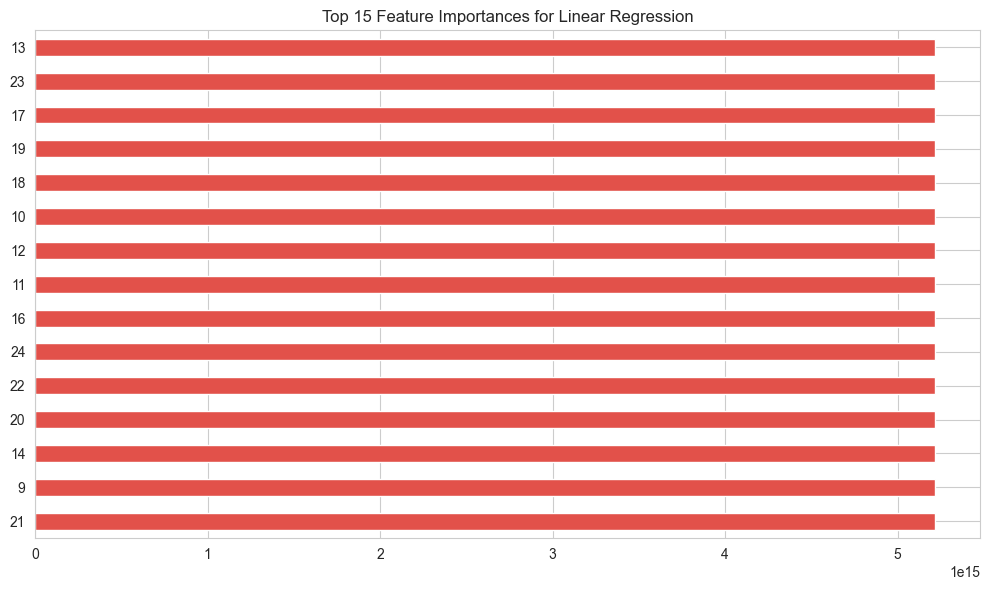

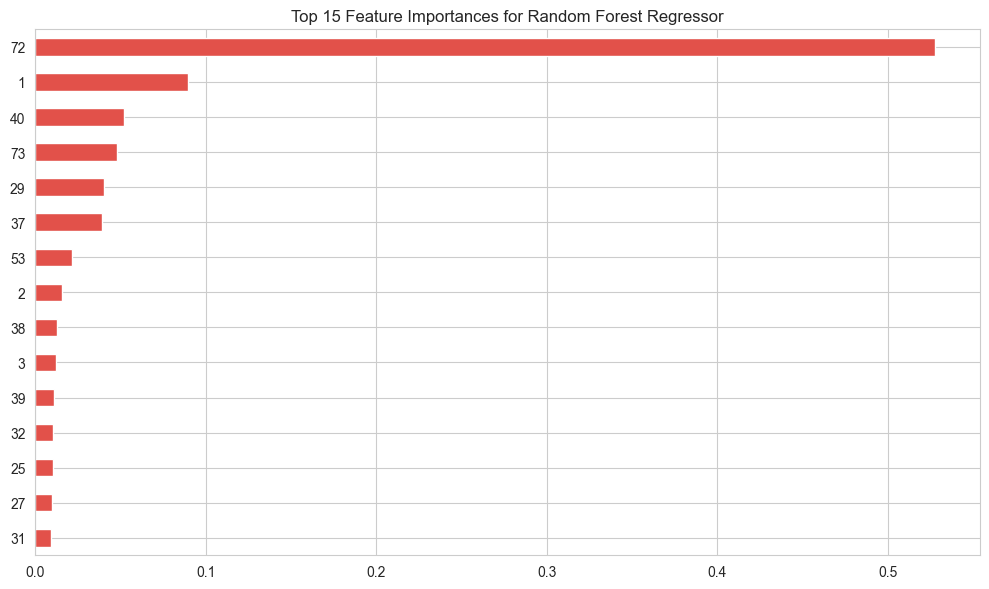

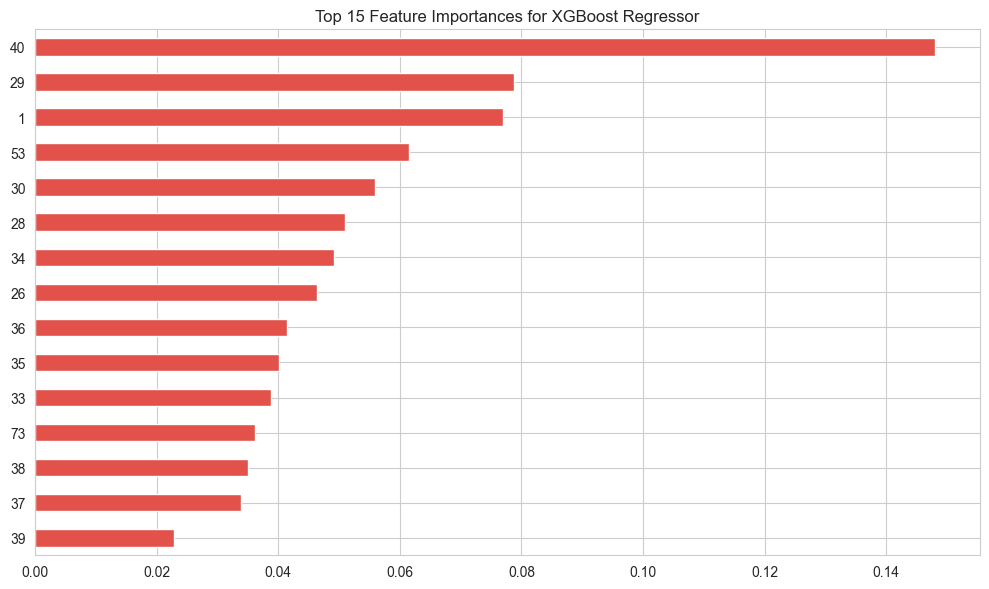

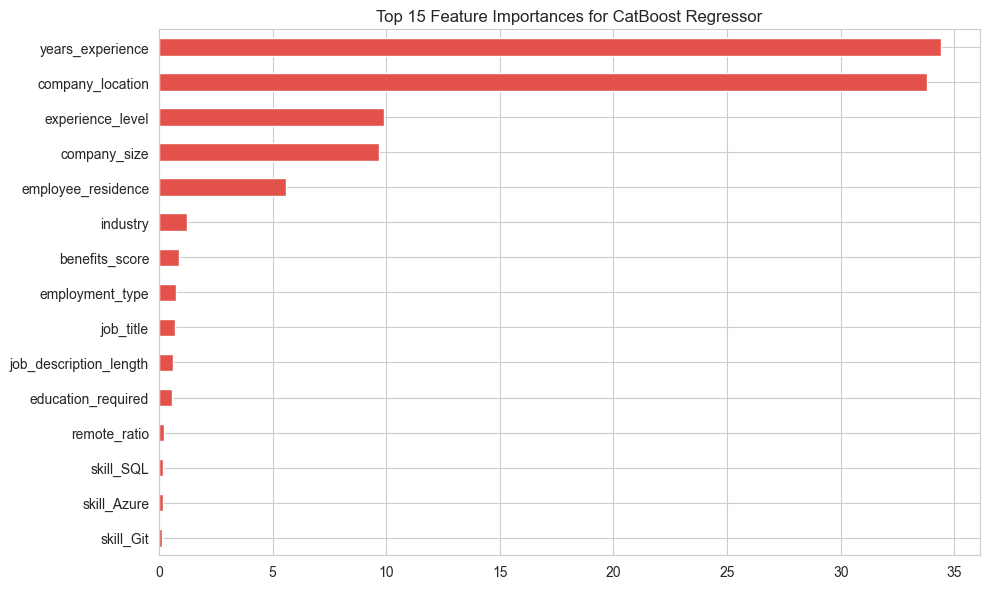

In [ ]:
print("\n--- Feature Importance Insights ---")
for model_name, importances in feature_importances.items():
    if not importances.empty:
        plt.figure(figsize=(10, 6))
        top_n = 15
        importances.nlargest(top_n).plot(kind='barh')
        plt.title(f'Top {top_n} Feature Importances for {model_name}')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()


Visualizing predictions for the best model: CatBoost Regressor


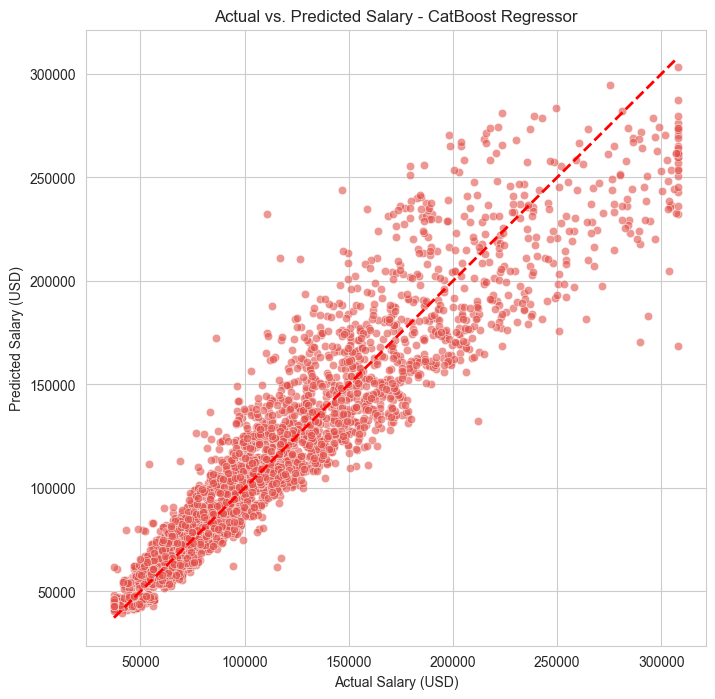

In [ ]:
best_model_name = results_df.index[0]
print(f"\nVisualizing predictions for the best model: {best_model_name}")

if best_model_name == "CatBoost Regressor":
    best_y_pred = y_pred_catboost
else:
    if best_model_name in models:
        best_model_pipeline = Pipeline(steps=[('preprocessor', preprocessor_for_standard_models),
                                       ('regressor', models[best_model_name])])
        best_model_pipeline.fit(X_train, y_train) 
        best_y_pred = best_model_pipeline.predict(X_test)
    else:
        print(f"Could not retrieve predictions for {best_model_name} automatically for plotting.")
        best_y_pred = None 

if best_y_pred is not None:
    plt.figure(figsize=(8, 8))
    sns.scatterplot(x=y_test, y=best_y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2) # Diagonal line
    plt.xlabel('Actual Salary (USD)')
    plt.ylabel('Predicted Salary (USD)')
    plt.title(f'Actual vs. Predicted Salary - {best_model_name}')
    plt.grid(True)
    plt.show()

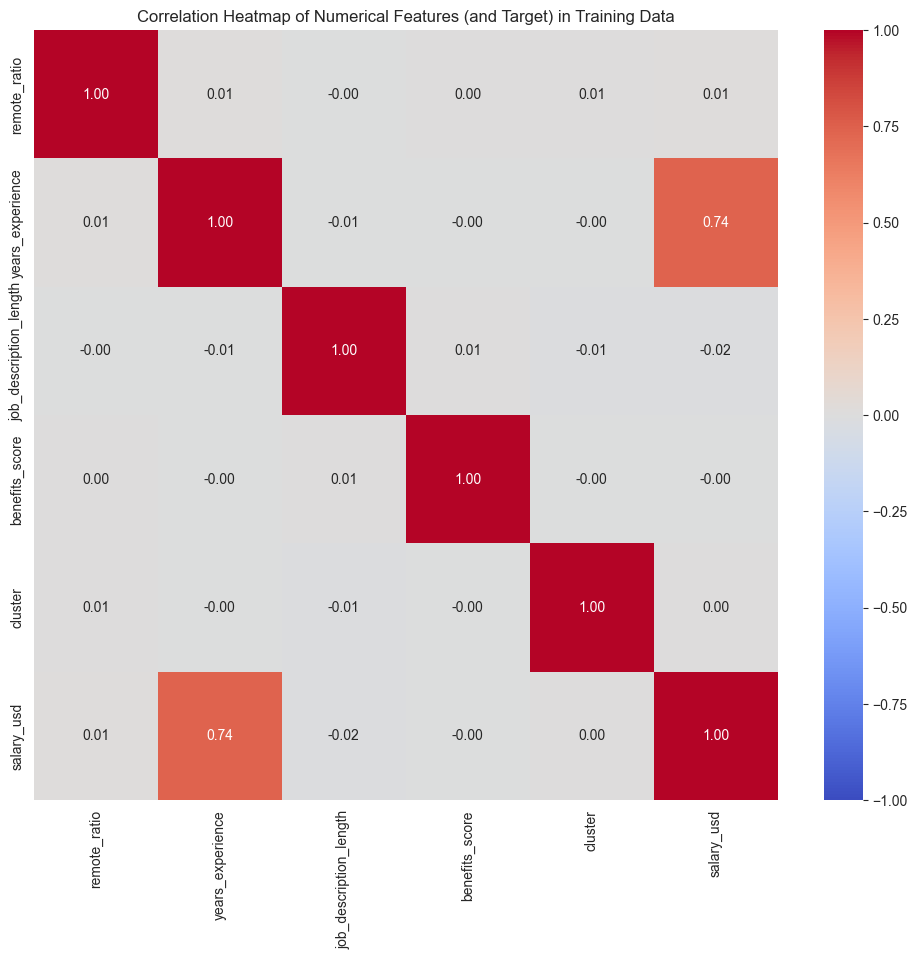

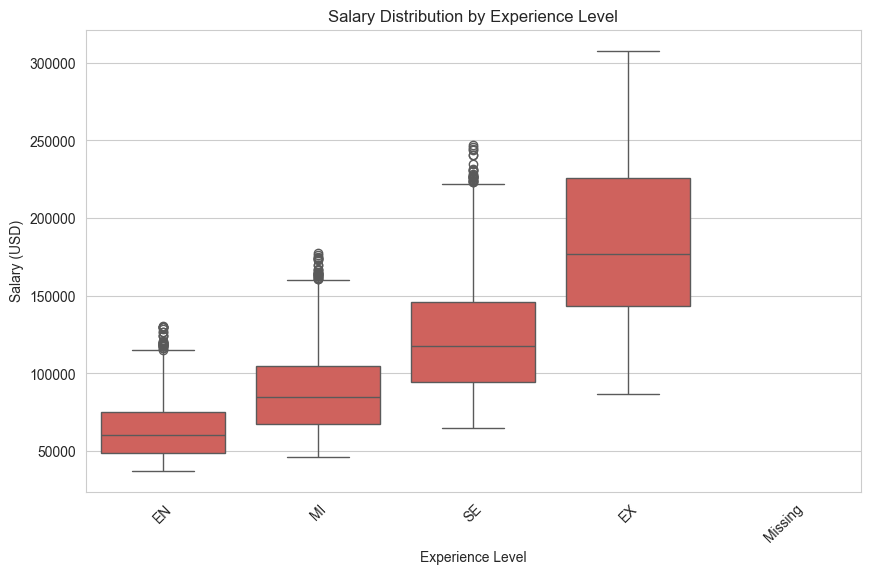

In [ ]:
numerical_cols_for_corr = X_train[active_numerical_features].copy() 
numerical_cols_for_corr[TARGET] = y_train

if not numerical_cols_for_corr.drop(TARGET, axis=1).empty: 
    plt.figure(figsize=(12, 10))
    sns.heatmap(numerical_cols_for_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap of Numerical Features (and Target) in Training Data')
    plt.show()
else:
    print("No numerical features selected for correlation heatmap.")

if 'experience_level' in X.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(x=X_train['experience_level'].fillna('Missing'), y=y_train, order=ordinal_features_map['experience_level'] + ['Missing'])
    plt.title('Salary Distribution by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Salary (USD)')
    plt.xticks(rotation=45)
    plt.show()

In [233]:
print("\n--- Project Code Execution Finished ---")
print("Expected outcomes covered:")
print("✓ Visualizations showing feature relationships, correlations, and distributions (examples provided).")
print("✓ Salary prediction model ready for deployment (models are trained; saving demonstrated conceptually).")
print("✓ Comparative performance of multiple regression algorithms (table shown).")
print("✓ Evaluation Metrics: R² Score, MAE / MSE / RMSE (included in the table).")
print("✓ Insights into which features most influence salary (feature importance plots shown).")


--- Project Code Execution Finished ---
Expected outcomes covered:
✓ Visualizations showing feature relationships, correlations, and distributions (examples provided).
✓ Salary prediction model ready for deployment (models are trained; saving demonstrated conceptually).
✓ Comparative performance of multiple regression algorithms (table shown).
✓ Evaluation Metrics: R² Score, MAE / MSE / RMSE (included in the table).
✓ Insights into which features most influence salary (feature importance plots shown).


In [ ]:
print(f"\nBest Model: {best_model_name} with R² Score: {results_df.loc[best_model_name, 'R²']:.2f}")

sample = X_test.iloc[[0]]
prediction = catboost_model.predict(sample)
print(f"Sample Prediction: ${prediction[0]:,.2f} USD for a sample role.")

import joblib
model_filename = f"best_model_{best_model_name.lower().replace(' ', '_')}.pkl"
joblib.dump(best_model_name, model_filename)
print(f"Best model saved as '{model_filename}'")



Best Model: CatBoost Regressor with R² Score: 0.87
Sample Prediction: $184,501.41 USD for a sample role.
Best model saved as 'best_model_catboost_regressor.pkl'
